In [ ]:
MutationFile = 'Chromo_Domain_Cutaneous_somatic_mutation_MELA_AU_DNVs_sorted_dinuc_filter.bed'
FastaFile = 'hg19.fa'
OutputFile = 'AC>TT_Mutation_Context_Frequency.csv'

from SequenceContext import CreateNewBedFile
CreateNewBedFile(1,1,MutationFile,FastaFile)

from CompareMutationContext import AttainMutationData
AttainMutationData('AC>TT', 'heterochromatin', OutputFile)

In [10]:
MutationFile = 'Cutaneous_somatic_mutation_MELA_AU_DNVs_sorted_dinuc_filter.bed'
OutputFile = 'AC>TT_Mutation_Context_Frequency.csv'
FastaFile = 'hg19.fa'
from ActuallyNormalizeData import NormalizeData
NormalizeData(OutputFile, FastaFile, 4, NormalizeToMedian=False)

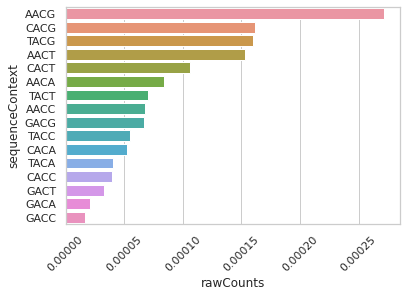

In [11]:
# Bar graphs
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
OutputFile = 'Raw_AC>TT_Mutation_Context_Frequency.csv'
gdata = pd.read_csv(OutputFile)
gdata = gdata.sort_values('rawCounts', ascending = False)
sns.set_theme(style = 'whitegrid')
g = sns.barplot(y = 'sequenceContext', x = 'rawCounts', data = gdata)
for item in g.get_xticklabels():
    item.set_rotation(45)

In [ ]:
OutputFile = 'AC>TT_Mutation_Context_Frequency.csv'
from CreateLinearRegressionFile import LinearFile
from PearsonR import RegressionAnalysis
LinearFile(OutputFile)
RegressionAnalysis(OutputFile)